In [110]:
from scipy.io import arff

import pandas as pd

import numpy as np 

import seaborn as sns

import plotly.express as px

from sklearn.decomposition import PCA

from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [2]:
data, meta = arff.loadarff("Lung.arff")

df = pd.DataFrame(data)

print(df)


     AFFX-MurIL2_at  AFFX-MurIL10_at  AFFX-MurIL4_at  AFFX-MurFAS_at  \
0           -18.600            10.54           0.010          19.440   
1             9.120             9.12          10.180          29.290   
2            -2.175            -2.21          -0.060           6.320   
3            -1.540            21.75           5.835          23.815   
4            -9.070             3.08          -1.980          17.260   
..              ...              ...             ...             ...   
198          35.140           106.16          52.280          65.340   
199         -21.150           -31.20         -11.820           8.280   
200          26.900            10.44          18.230          33.830   
201          23.800            29.14          31.800          65.610   
202         -18.370            -1.03          -8.260          27.150   

     AFFX-BioB-5_at  AFFX-BioB-M_at  AFFX-BioB-3_at  AFFX-BioC-5_at  \
0           -16.980          -27.50          -1.600           38

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum().sum()

0

In [5]:
dicti = {}
for i in df[:]['type']:
    if i not in dicti.keys():
        dicti[i] = 1
    else:
        dicti[i] += 1
print(dicti)

{b'1': 139, b'2': 17, b'3': 6, b'4': 21, b'5': 20}


In [6]:
X = df.drop('type', axis=1)
y = df['type']

In [7]:

label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)
y_binary


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4])

In [8]:
scale=StandardScaler()
X_scaled=scale.fit_transform(X)


In [9]:
X_scaled.shape

(203, 12600)

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_binary,test_size=0.40,random_state=42,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((121, 12600), (121,), (82, 12600), (82,))

In [87]:
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.fit_transform(y_test)
# y_train_encoded,y_test_encoded

In [88]:
X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)

In [89]:

scores=[]

RandomForest=RandomForestClassifier()

no_of_features=[x*100 for x in range(1,120)]


for i in no_of_features:
    
    selector = SelectKBest(f_classif, k=i)     
    
    X_selected = selector.fit_transform(X_scaled, y)
    
    selected_indices = selector.get_support(indices=True)

    RandomForest.fit(X_train[selected_indices],y_train)
    
    scores.append(RandomForest.score(X_test[list(selected_indices)],y_test))
    

In [90]:
socre_per_features=[i for i in zip(no_of_features,scores)]
socre_per_features=np.array(socre_per_features)
socre_per_features

array([[1.00000000e+02, 9.02439024e-01],
       [2.00000000e+02, 9.14634146e-01],
       [3.00000000e+02, 9.26829268e-01],
       [4.00000000e+02, 9.14634146e-01],
       [5.00000000e+02, 9.14634146e-01],
       [6.00000000e+02, 9.26829268e-01],
       [7.00000000e+02, 9.14634146e-01],
       [8.00000000e+02, 9.39024390e-01],
       [9.00000000e+02, 9.02439024e-01],
       [1.00000000e+03, 9.14634146e-01],
       [1.10000000e+03, 9.14634146e-01],
       [1.20000000e+03, 9.14634146e-01],
       [1.30000000e+03, 8.90243902e-01],
       [1.40000000e+03, 9.02439024e-01],
       [1.50000000e+03, 9.14634146e-01],
       [1.60000000e+03, 9.02439024e-01],
       [1.70000000e+03, 9.02439024e-01],
       [1.80000000e+03, 8.90243902e-01],
       [1.90000000e+03, 9.02439024e-01],
       [2.00000000e+03, 9.02439024e-01],
       [2.10000000e+03, 8.90243902e-01],
       [2.20000000e+03, 9.02439024e-01],
       [2.30000000e+03, 9.14634146e-01],
       [2.40000000e+03, 9.02439024e-01],
       [2.500000

In [91]:

best_no_of_features_values = max(socre_per_features, key=lambda x: x[1])

best_no_of_features=int(best_no_of_features_values[0])
highest_accuracy=best_no_of_features_values[1]
print(f"{best_no_of_features} is the best number of feature based on f_classif feature selection technique technique with {highest_accuracy: .4} accuracy using RandomForest model")


800 is the best number of feature based on f_classif feature selection technique technique with  0.939 accuracy using RandomForest model


In [97]:
selector = SelectKBest(f_classif, k=best_no_of_features)  # Select top 5 features (adjust as needed)
X_selected = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)

#selected genes
selected_features = X.columns[selected_indices]

print("Selected Features:", selected_features)


Selected Features: Index(['31403_at', '31444_s_at', '31525_s_at', '31638_at', '31687_f_at',
       '31918_at', '32425_at', '32444_at', '32996_g_at', '33051_at',
       ...
       '227_g_at', '236_at', '237_s_at', '202_at', '185_at', '197_at',
       '198_g_at', '162_at', '149_at', '113_i_at'],
      dtype='object', length=800)


In [98]:
RandomForest.fit(X_train[selected_indices],y_train)

RandomForestClassifier()

In [99]:
pred=RandomForest.predict(X_test[selected_indices])
pred

array([1, 0, 0, 0, 0, 0, 0, 1, 4, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 4, 1, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 4, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0])

In [100]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        60
           1       0.86      0.86      0.86         7
           2       1.00      1.00      1.00         2
           3       0.56      1.00      0.71         5
           4       1.00      1.00      1.00         8

    accuracy                           0.93        82
   macro avg       0.88      0.95      0.90        82
weighted avg       0.95      0.93      0.93        82



<AxesSubplot:>

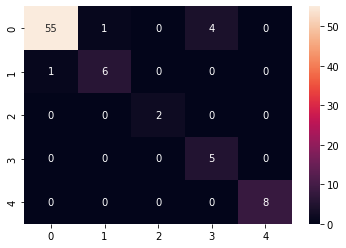

In [102]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

In [96]:
logregression = LogisticRegression()

logregression.fit(X_train[selected_indices], y_train)  



C:\Users\khali\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred = logregression.predict(X_test)         
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [81]:

print(f"Accuracy: {accuracy:.3f}")
print(f"Classification Summary:\n {report}")

Accuracy: 0.951
Classification Summary:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4

    accuracy                           0.95        41
   macro avg       0.94      0.94      0.94        41
weighted avg       0.95      0.95      0.95        41



In [85]:
y_pred_decoded = label_encoder.inverse_transform(y_pred)
print(f"Predicted Cancer Types:{y_pred_decoded}")

Predicted Cancer Types:[b'1' b'1' b'1' b'3' b'1' b'5' b'1' b'4' b'1' b'5' b'1' b'2' b'1' b'1'
 b'1' b'2' b'4' b'1' b'1' b'1' b'5' b'4' b'1' b'1' b'1' b'1' b'1' b'2'
 b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'1' b'4' b'1' b'2' b'5']


In [111]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)


SyntaxError: invalid non-printable character U+00A0 (517063806.py, line 1)

In [73]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 output classes, one for each type of cancer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

array([0, 0, 0, 2, 0, 4, 0, 3, 0, 4, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 4, 3,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 4])

In [106]:


numerical_columns = df.select_dtypes(include='number')

n_components = 2
pca = PCA(n_components=n_components)

principal_components = pca.fit_transform(numerical_columns)

principal_df = pd.DataFrame(data=principal_components, columns=['PC{}'.format(i+1) for i in range(n_components)])

print(principal_df)




              PC1          PC2
0     4294.574337 -2602.990841
1    -7321.610286 -5683.607700
2    -4849.176655 -2224.593600
3    -6903.139069 -6631.328832
4    -7544.389198  -916.036561
..            ...          ...
198  19985.371627 -2843.106427
199  14886.420314  -200.846280
200  18104.805557 -1491.061718
201   5273.521690 -2116.568138
202  20824.485992 -2167.989498

[203 rows x 2 columns]
